In [1]:
import os
import sys
sys.path.append('common')
import util, audio_preprocessing

import shutil
import numpy as np
import keras
import keras.backend as K
from keras.callbacks import ModelCheckpoint, Callback, TensorBoard
from matplotlib import pyplot as plt
%matplotlib inline
from cyclic_lr import CyclicLR

from dataset import SingleDataset, MultiDataset
from model import model_mlt_cnn_alexnet

TRY = 'MIX4'
LOG_DIR = './%slog' % TRY
SCD_PREFIX = 'scd_'
USD_PREFIX = 'usd_'

batch_size = 32
epochs = 150

scd = SingleDataset(SCD_PREFIX,
                   util.load_txt_list(os.path.join('.', SCD_PREFIX+'classes.txt')),
                   batch_size)
usd = SingleDataset(USD_PREFIX,
                   ['air_conditioner',  'car_horn', 'children_playing', 'dog_bark', 'drilling',
                    'engine_idling', 'gun_shot','jackhammer', 'siren', 'street_music'],
                   batch_size)

Using TensorFlow backend.


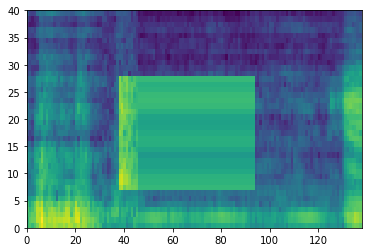

In [2]:
multi = MultiDataset([scd, usd], [0.5, 0.5])

# Confirmation
def plot_dataset(X, n=1):
    for i in range(n):
        x = X[i]
        plt.pcolormesh(x[..., -1])
        plt.show()
X = next(multi.train_generator)[0]
plot_dataset(X)

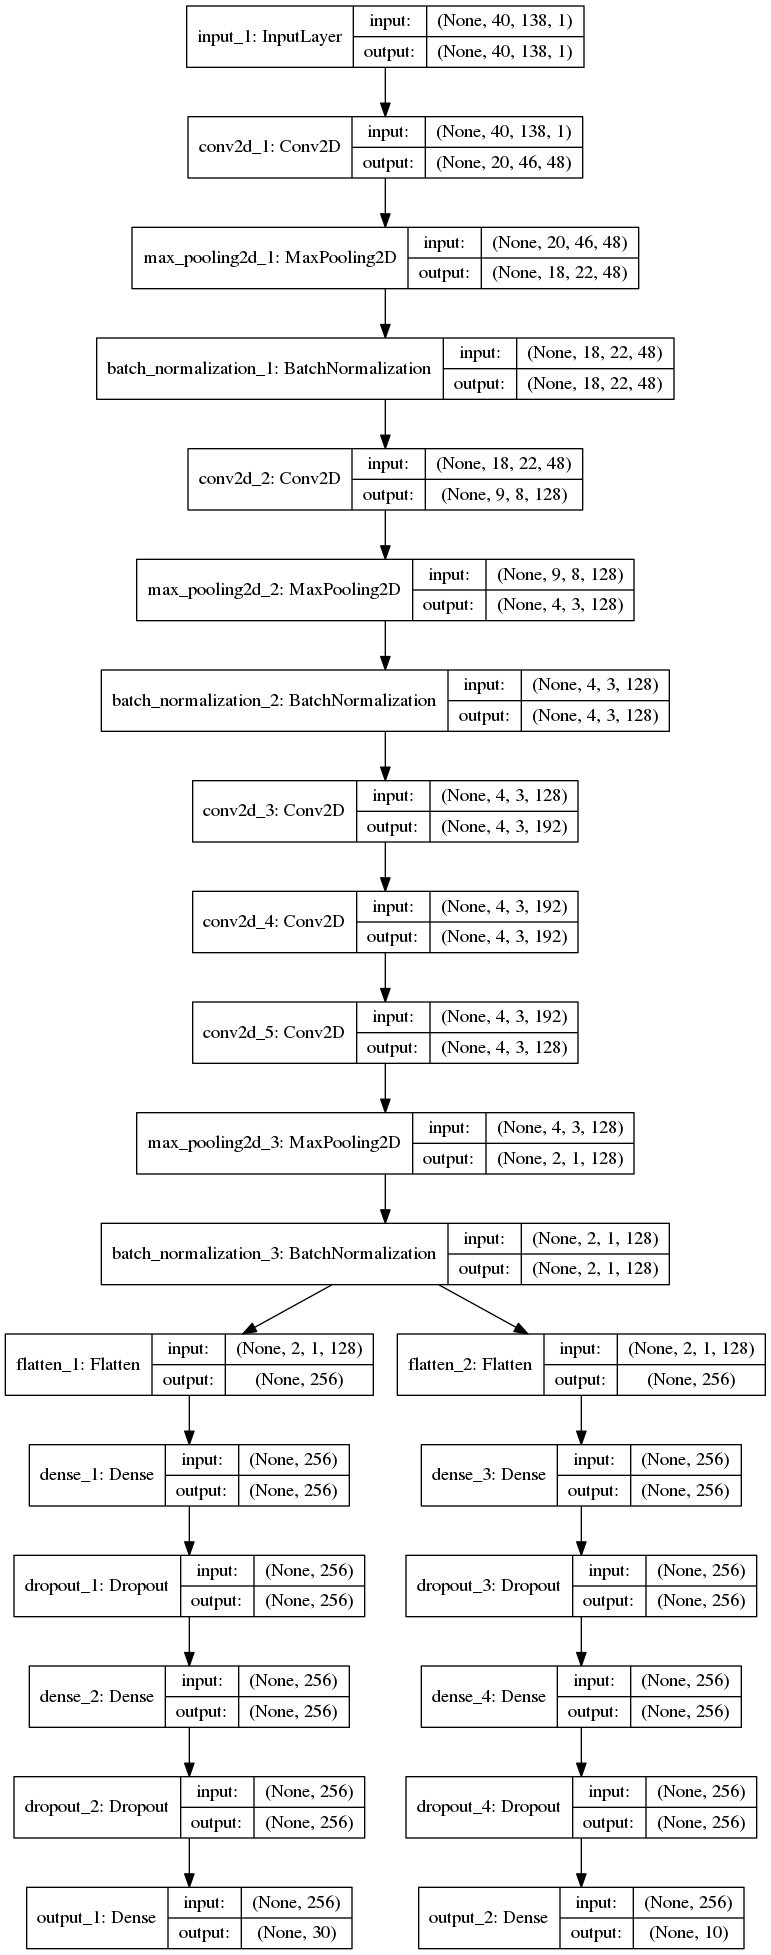

In [3]:
model = model_mlt_cnn_alexnet(multi.input_shape(), multi.ys_classes())
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
#model.summary()
from keras.utils import plot_model
plot_model(model, to_file='structure%s.png' % TRY, show_shapes=True)
from IPython.display import Image
Image(filename='structure%s.png' % TRY) 

In [8]:
callbacks = [
    CyclicLR(base_lr=0.00007, max_lr=0.0007, step_size=multi.train_steps_per_epoch, mode='triangular'),
    ModelCheckpoint('model%s.h5' % TRY,
                monitor='val_output_1_acc',
                verbose=1,
                save_best_only=True,
                save_weights_only=True),
     keras.callbacks.TensorBoard(log_dir=LOG_DIR, histogram_freq=0, write_graph=True, write_images=True)
]

# Clean up log
shutil.rmtree(LOG_DIR, ignore_errors=True)

model.fit_generator(multi.train_generator,
                    steps_per_epoch=multi.train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=multi.valid_generator, 
                    validation_steps=multi.valid_steps_per_epoch,
                    callbacks=callbacks)

Epoch 1/150
1594/1596 [============================>.] - ETA: 0s - loss: 2.8403 - output_1_loss: 1.7294 - output_2_loss: 1.1109 - output_1_acc: 0.0381 - output_2_acc: 0.1989
Epoch 00001: val_output_1_acc improved from -inf to 0.05508, saving model to modelMIX4.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 2.8402 - output_1_loss: 1.7293 - output_2_loss: 1.1108 - output_1_acc: 0.0380 - output_2_acc: 0.1990 - val_loss: 2.6266 - val_output_1_loss: 1.6864 - val_output_2_loss: 0.9402 - val_output_1_acc: 0.0551 - val_output_2_acc: 0.3857
Epoch 2/150
1594/1596 [============================>.] - ETA: 0s - loss: 2.6781 - output_1_loss: 1.6774 - output_2_loss: 1.0007 - output_1_acc: 0.0576 - output_2_acc: 0.3210
Epoch 00002: val_output_1_acc improved from 0.05508 to 0.09605, saving model to modelMIX4.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 2.6780 - output_1_loss: 1.6773 - output_2_loss: 1.0007 - output_1_acc: 0.0576 - output_2_acc: 0.3210 - va

Epoch 16/150
1594/1596 [============================>.] - ETA: 0s - loss: 2.2332 - output_1_loss: 1.3822 - output_2_loss: 0.8510 - output_1_acc: 0.2929 - output_2_acc: 0.4948
Epoch 00016: val_output_1_acc improved from 0.54109 to 0.54751, saving model to modelMIX4.h5
1596/1596 [==============================] - 74s 47ms/step - loss: 2.2335 - output_1_loss: 1.3823 - output_2_loss: 0.8512 - output_1_acc: 0.2928 - output_2_acc: 0.4947 - val_loss: 1.5383 - val_output_1_loss: 0.8233 - val_output_2_loss: 0.7151 - val_output_1_acc: 0.5475 - val_output_2_acc: 0.5121
Epoch 17/150
1594/1596 [============================>.] - ETA: 0s - loss: 2.2075 - output_1_loss: 1.3656 - output_2_loss: 0.8419 - output_1_acc: 0.3106 - output_2_acc: 0.5048
Epoch 00017: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 2.2076 - output_1_loss: 1.3655 - output_2_loss: 0.8420 - output_1_acc: 0.3106 - output_2_acc: 0.5046 - val_loss: 1.6157 - val_output_1_loss: 0.8748

1594/1596 [============================>.] - ETA: 0s - loss: 1.9790 - output_1_loss: 1.1932 - output_2_loss: 0.7858 - output_1_acc: 0.4707 - output_2_acc: 0.5632
Epoch 00046: val_output_1_acc improved from 0.75899 to 0.76631, saving model to modelMIX4.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 1.9790 - output_1_loss: 1.1932 - output_2_loss: 0.7858 - output_1_acc: 0.4706 - output_2_acc: 0.5631 - val_loss: 1.1529 - val_output_1_loss: 0.4647 - val_output_2_loss: 0.6882 - val_output_1_acc: 0.7663 - val_output_2_acc: 0.5386
Epoch 47/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.9616 - output_1_loss: 1.1772 - output_2_loss: 0.7843 - output_1_acc: 0.4825 - output_2_acc: 0.5622
Epoch 00047: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.9616 - output_1_loss: 1.1772 - output_2_loss: 0.7844 - output_1_acc: 0.4825 - output_2_acc: 0.5622 - val_loss: 1.2188 - val_output_1_loss: 0.5501 - val_output

Epoch 62/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.9230 - output_1_loss: 1.1518 - output_2_loss: 0.7711 - output_1_acc: 0.5086 - output_2_acc: 0.5775
Epoch 00062: val_output_1_acc improved from 0.79494 to 0.79982, saving model to modelMIX4.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 1.9230 - output_1_loss: 1.1518 - output_2_loss: 0.7711 - output_1_acc: 0.5085 - output_2_acc: 0.5776 - val_loss: 1.0772 - val_output_1_loss: 0.4127 - val_output_2_loss: 0.6645 - val_output_1_acc: 0.7998 - val_output_2_acc: 0.5479
Epoch 63/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9138 - output_1_loss: 1.1492 - output_2_loss: 0.7646 - output_1_acc: 0.5104 - output_2_acc: 0.5847
Epoch 00063: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.9140 - output_1_loss: 1.1494 - output_2_loss: 0.7646 - output_1_acc: 0.5103 - output_2_acc: 0.5847 - val_loss: 1.1670 - val_output_1_loss: 0.4653

Epoch 78/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8882 - output_1_loss: 1.1276 - output_2_loss: 0.7606 - output_1_acc: 0.5286 - output_2_acc: 0.5906
Epoch 00078: val_output_1_acc did not improve
1596/1596 [==============================] - 75s 47ms/step - loss: 1.8882 - output_1_loss: 1.1276 - output_2_loss: 0.7606 - output_1_acc: 0.5287 - output_2_acc: 0.5906 - val_loss: 1.0473 - val_output_1_loss: 0.3956 - val_output_2_loss: 0.6518 - val_output_1_acc: 0.8037 - val_output_2_acc: 0.5569
Epoch 79/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8763 - output_1_loss: 1.1192 - output_2_loss: 0.7571 - output_1_acc: 0.5338 - output_2_acc: 0.5890
Epoch 00079: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 47ms/step - loss: 1.8764 - output_1_loss: 1.1194 - output_2_loss: 0.7571 - output_1_acc: 0.5336 - output_2_acc: 0.5890 - val_loss: 1.1364 - val_output_1_loss: 0.4415 - val_output_2_loss: 0.6950 - val_output_1_acc

Epoch 94/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8605 - output_1_loss: 1.1111 - output_2_loss: 0.7493 - output_1_acc: 0.5402 - output_2_acc: 0.6017
Epoch 00094: val_output_1_acc improved from 0.81549 to 0.82435, saving model to modelMIX4.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8604 - output_1_loss: 1.1111 - output_2_loss: 0.7493 - output_1_acc: 0.5403 - output_2_acc: 0.6018 - val_loss: 1.0358 - val_output_1_loss: 0.3706 - val_output_2_loss: 0.6651 - val_output_1_acc: 0.8243 - val_output_2_acc: 0.5517
Epoch 95/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8528 - output_1_loss: 1.1049 - output_2_loss: 0.7480 - output_1_acc: 0.5463 - output_2_acc: 0.6038
Epoch 00095: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8529 - output_1_loss: 1.1049 - output_2_loss: 0.7480 - output_1_acc: 0.5463 - output_2_acc: 0.6038 - val_loss: 1.0869 - val_output_1_loss: 0.4124

Epoch 110/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8422 - output_1_loss: 1.0963 - output_2_loss: 0.7460 - output_1_acc: 0.5528 - output_2_acc: 0.6043
Epoch 00110: val_output_1_acc improved from 0.82730 to 0.82768, saving model to modelMIX4.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8422 - output_1_loss: 1.0962 - output_2_loss: 0.7460 - output_1_acc: 0.5529 - output_2_acc: 0.6043 - val_loss: 1.0226 - val_output_1_loss: 0.3614 - val_output_2_loss: 0.6612 - val_output_1_acc: 0.8277 - val_output_2_acc: 0.5547
Epoch 111/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8319 - output_1_loss: 1.0920 - output_2_loss: 0.7399 - output_1_acc: 0.5593 - output_2_acc: 0.6105
Epoch 00111: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8319 - output_1_loss: 1.0920 - output_2_loss: 0.7399 - output_1_acc: 0.5594 - output_2_acc: 0.6104 - val_loss: 1.0926 - val_output_1_loss: 0.39

Epoch 126/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8291 - output_1_loss: 1.0899 - output_2_loss: 0.7391 - output_1_acc: 0.5624 - output_2_acc: 0.6118
Epoch 00126: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8292 - output_1_loss: 1.0901 - output_2_loss: 0.7391 - output_1_acc: 0.5623 - output_2_acc: 0.6118 - val_loss: 1.0190 - val_output_1_loss: 0.3599 - val_output_2_loss: 0.6591 - val_output_1_acc: 0.8263 - val_output_2_acc: 0.5627
Epoch 127/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8185 - output_1_loss: 1.0832 - output_2_loss: 0.7353 - output_1_acc: 0.5625 - output_2_acc: 0.6160
Epoch 00127: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 47ms/step - loss: 1.8185 - output_1_loss: 1.0832 - output_2_loss: 0.7354 - output_1_acc: 0.5625 - output_2_acc: 0.6159 - val_loss: 1.1032 - val_output_1_loss: 0.4084 - val_output_2_loss: 0.6948 - val_output_1_a

Epoch 142/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8122 - output_1_loss: 1.0793 - output_2_loss: 0.7330 - output_1_acc: 0.5707 - output_2_acc: 0.6160
Epoch 00142: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8122 - output_1_loss: 1.0792 - output_2_loss: 0.7330 - output_1_acc: 0.5708 - output_2_acc: 0.6160 - val_loss: 1.0016 - val_output_1_loss: 0.3478 - val_output_2_loss: 0.6538 - val_output_1_acc: 0.8250 - val_output_2_acc: 0.5616
Epoch 143/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8041 - output_1_loss: 1.0727 - output_2_loss: 0.7314 - output_1_acc: 0.5712 - output_2_acc: 0.6177
Epoch 00143: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8041 - output_1_loss: 1.0728 - output_2_loss: 0.7314 - output_1_acc: 0.5711 - output_2_acc: 0.6177 - val_loss: 1.0609 - val_output_1_loss: 0.3681 - val_output_2_loss: 0.6928 - val_output_1_a

## Evaluate per dataset

In [13]:
model.load_weights('model%s.h5' % TRY)
multi.evaluate_by_datasets(model)

Evaluating scd_dataset
6798/6798 [==============================] - 10s 1ms/step
 = 0.9018829067372757
Evaluating usd_dataset
990/990 [==============================] - 1s 1ms/step
 = 0.593939393939394
Accuracy with scd_dataset = 0.901883
Accuracy with usd_dataset = 0.593939


[0.9018829067372757, 0.593939393939394]

## Evaluate by mixed dataset

In [4]:
model.load_weights('model%s.h5' % TRY)
multi.reset()
results = model.evaluate_generator(multi.valid_generator, steps=multi.valid_steps_per_epoch)
print(model.metrics_names, results)

['loss', 'output_1_loss', 'output_2_loss', 'output_1_acc', 'output_2_acc'] [1.076207467919272, 0.3763986273230908, 0.6998088414181439, 0.8167693888032871, 0.5427580893682589]


[[ 9 19 14  2  4 23 21  1 27  8 29 23 15  4 10 12 21 11 15  3 24 29  5 27
   3  5  3 21  4 11  0  6]
 [ 8  1  9  3  3  4  5  4  9  2  0  4  5  2  5  9  5  2  6  0  9  7  6  4
   1  8  0  9  2  4  2  5]
 [ 3 26 25 21  4 11 21 25 27  8  7 23 15  4 10 12 25 10 15 21 20 13  1 27
   3  9  3 21  0 28  0  6]
 [ 2  1  9  3  7  4  9  4  9  2  5  4  5  2  5  9  5  9  4  0  3  7  6  4
   9  9  0  9  8  4  9  3]]


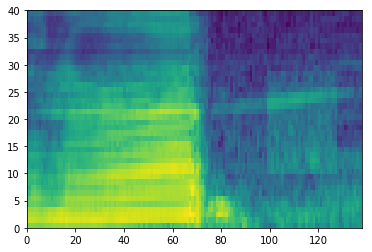

In [16]:
Xs, yss = next(multi.train_generator)
multi_preds = model.predict(Xs)
print(np.array([[np.argmax(pred) for pred in preds] for preds in multi_preds] + [[np.argmax(y) for y in ys] for ys in yss]))
plot_dataset(Xs)